In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df  = pd.read_csv('https://raw.githubusercontent.com/jingjayy/PDS202207/main/telco_customer_churn_dataset.csv?raw=true')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# convert totalCharges columns data types from string to double
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [ ]:
# we have converted totalCharges column data type into numeric data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# we create an array first
binary_columns = ["Partner", "PhoneService", "Dependents", "PaperlessBilling", "Churn"]

# we use for loop to convert all columns in the array from object to numeric data type
for column in binary_columns:
    df[column] = df[column].map({"No": 0, "Yes": 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
# go to this column and get all the value stored in this column
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [ ]:
# remap the value in this columns to binary value 1 or 0 only
df['MultipleLines'] = df['MultipleLines'].map({"No" : 0, "Yes": 1, "No phone service":0})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df['MultipleLines'].unique()

array([0, 1])

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
df['OnlineSecurity'] = df['OnlineSecurity'].map({"No": 0, "Yes": 1, "No internet service": 0})

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2303,7377-DMMRI,Male,0,0,0,2,1,0,DSL,1,...,No,No,No,No,Month-to-month,1,Electronic check,47.80,92.45,1
6663,0674-EYYZV,Female,0,0,0,1,1,0,DSL,0,...,No,No,Yes,No,Month-to-month,1,Electronic check,54.65,54.65,0
5553,6629-CZTTH,Male,0,0,0,1,1,0,DSL,0,...,No,No,No,Yes,Month-to-month,1,Mailed check,55.70,55.70,1
3680,0836-SEYLU,Male,0,1,0,9,0,0,DSL,0,...,No,Yes,Yes,No,Month-to-month,0,Mailed check,40.65,328.95,1
6316,8946-BFWSG,Male,0,1,1,63,1,1,No,0,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.25,1573.05,0
3030,1761-AEZZR,Male,0,0,0,1,1,0,Fiber optic,0,...,No,No,Yes,No,Month-to-month,1,Electronic check,79.55,79.55,1
5555,8750-QWZAJ,Female,0,1,1,70,1,0,No,0,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),19.80,1378.75,0
4589,1494-EJZDW,Female,0,1,1,10,1,0,No,0,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.15,220.80,0
3410,4918-QLLIW,Male,0,0,0,3,1,0,DSL,0,...,No,No,Yes,No,Month-to-month,0,Credit card (automatic),53.40,188.70,1
3671,8816-VXNZD,Female,0,0,0,1,1,1,Fiber optic,0,...,No,No,No,No,Month-to-month,1,Electronic check,75.10,75.10,1


In [ ]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
# create 3 more new column based on the three unique value of internet service
df = pd.get_dummies(data=df, columns=['InternetService'])

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
195,2604-IJPDU,Female,0,1,0,20,1,0,1,Yes,...,No,Month-to-month,1,Electronic check,96.55,1901.65,0,0,1,0
6169,4847-QNOKA,Female,0,0,0,1,1,0,0,No,...,No,Month-to-month,1,Bank transfer (automatic),44.90,44.90,1,1,0,0
2412,1623-NLDOT,Female,0,1,0,42,0,0,0,Yes,...,No,One year,0,Mailed check,33.55,1445.30,1,1,0,0
4430,5061-PBXFW,Female,0,1,1,32,1,0,1,Yes,...,No,Month-to-month,0,Bank transfer (automatic),61.40,1864.65,0,1,0,0
2386,1247-QBVSH,Female,0,1,1,43,1,0,0,Yes,...,No,Month-to-month,0,Mailed check,50.20,2169.40,0,1,0,0
2946,3404-JNXAX,Female,0,1,1,51,1,1,0,No,...,No,Month-to-month,1,Electronic check,80.75,4116.90,0,0,1,0
1368,6250-CGGUN,Male,0,0,0,54,1,0,1,No,...,No,One year,0,Electronic check,84.40,4484.05,0,0,1,0
4154,4229-CZMLL,Male,0,0,0,6,1,1,0,No,...,No,Month-to-month,1,Electronic check,74.90,469.80,1,0,1,0
3003,2640-PMGFL,Male,0,0,1,27,1,1,0,No,...,No,Month-to-month,1,Electronic check,79.50,2180.55,1,0,1,0
4947,4735-ASGMA,Male,0,0,0,26,1,1,0,No,...,Yes,Month-to-month,1,Electronic check,98.35,2515.30,1,0,1,0


In [ ]:
df['gender'] = df['gender'].map({"Female": 0,"Male": 1})
# are you  male or female. female=0 male=1

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
4629,6112-KTHFQ,0,0,0,0,13,1,0,0,No internet service,...,No internet service,Month-to-month,1,Mailed check,19.30,279.30,0,0,0,1
4458,2037-SGXHH,1,0,1,1,38,1,1,0,Yes,...,No,Month-to-month,1,Electronic check,94.65,3624.30,1,0,1,0
4099,6624-JDRDS,0,0,0,0,6,0,0,1,No,...,No,Month-to-month,0,Bank transfer (automatic),29.45,161.45,0,1,0,0
6295,7033-CLAMM,0,0,1,1,48,1,0,0,No internet service,...,No internet service,Two year,0,Bank transfer (automatic),20.20,1027.25,0,0,0,1
1786,7530-HDYDS,0,0,0,0,38,1,0,0,Yes,...,No,Month-to-month,1,Credit card (automatic),84.25,3264.50,1,0,1,0
2620,7799-DSEWS,1,0,0,0,18,1,0,1,No,...,No,Month-to-month,1,Electronic check,68.35,1299.80,0,1,0,0
2998,4770-UEZOX,1,0,0,0,2,1,0,0,Yes,...,No,Month-to-month,1,Electronic check,74.75,144.80,0,0,1,0
3779,8631-NBHFZ,1,1,1,1,66,1,1,1,Yes,...,No,Two year,0,Credit card (automatic),79.40,5154.60,1,1,0,0
534,9282-IZGQK,0,0,0,0,1,1,1,0,No,...,Yes,Month-to-month,1,Electronic check,85.00,85.00,1,0,1,0
3395,6794-HKIAJ,1,0,0,0,62,1,1,1,Yes,...,No,Month-to-month,0,Bank transfer (automatic),90.70,5586.45,0,0,1,0


In [ ]:
Internet_columns = ['DeviceProtection', 'TechSupport', 'OnlineBackup', 'StreamingTV', 'StreamingMovies']

for column in Internet_columns:
  df[column] = df[column].map({"No": 0, "Yes": 1, "No internet service": 0})

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
5208,6502-KUGLL,0,0,1,1,14,1,0,1,1,...,0,Month-to-month,0,Bank transfer (automatic),59.45,780.85,0,1,0,0
390,3597-MVHJT,0,0,0,0,27,1,1,0,0,...,1,Month-to-month,1,Bank transfer (automatic),95.60,2595.25,0,0,1,0
2802,3001-CBHLQ,1,1,1,0,32,1,1,0,0,...,1,Month-to-month,1,Electronic check,104.90,3351.55,1,0,1,0
1799,9172-ANCRX,0,0,0,0,10,1,1,1,0,...,1,Month-to-month,1,Electronic check,98.70,973.25,1,0,1,0
1544,3794-NFNCH,1,0,1,0,30,1,0,0,0,...,0,Month-to-month,1,Mailed check,50.00,1474.90,0,1,0,0
5381,9465-RWMXL,1,0,1,0,32,1,1,0,0,...,0,Month-to-month,1,Electronic check,78.90,2447.95,1,0,1,0
1730,3877-JRJIP,1,0,0,0,1,1,1,0,0,...,0,Month-to-month,1,Electronic check,59.85,59.85,1,1,0,0
3542,1301-LOPVR,1,0,1,1,29,0,0,1,1,...,1,One year,1,Credit card (automatic),55.35,1636.95,0,1,0,0
800,5671-RQRLP,0,1,1,0,70,1,1,0,0,...,0,Two year,1,Credit card (automatic),75.65,5411.40,0,0,1,0
5227,4060-LDNLU,1,0,0,0,7,1,1,0,0,...,1,Month-to-month,0,Electronic check,96.20,639.70,0,0,1,0


In [ ]:
# now you can get the count, mean, min, max value for all the numeric
# data type columns, before this most of the columns in our dataset is object/string
# we cannot get these statitical value of object data type before
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.216669
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,0.441561,0.474991,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df = df.dropna()
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785,0.343572,0.440273,0.216155
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782,0.474934,0.496455,0.411650
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customerID                   7032 non-null   object 
 1   gender                       7032 non-null   int64  
 2   SeniorCitizen                7032 non-null   int64  
 3   Partner                      7032 non-null   int64  
 4   Dependents                   7032 non-null   int64  
 5   tenure                       7032 non-null   int64  
 6   PhoneService                 7032 non-null   int64  
 7   MultipleLines                7032 non-null   int64  
 8   OnlineSecurity               7032 non-null   int64  
 9   OnlineBackup                 7032 non-null   int64  
 10  DeviceProtection             7032 non-null   int64  
 11  TechSupport                  7032 non-null   int64  
 12  StreamingTV                  7032 non-null   int64  
 13  StreamingMovies   

<ipython-input-29-b5144bbded47>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

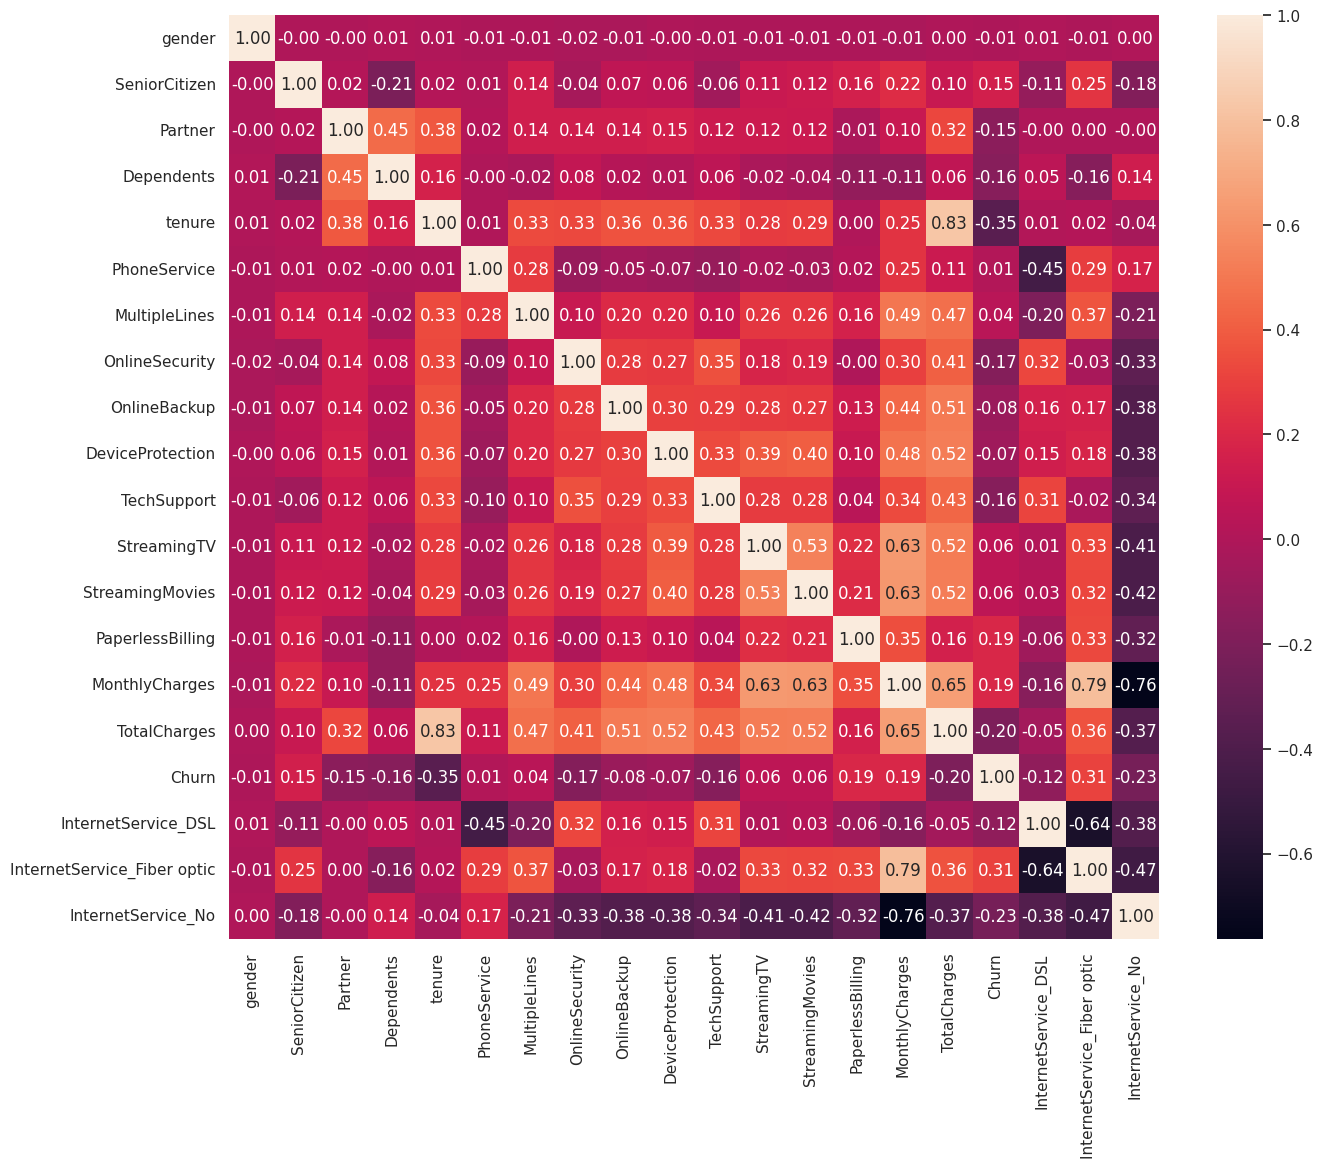

In [ ]:
  sns.set(rc ={'figure.figsize' :(15,12)})

  corr = df.corr()
  sns.heatmap(corr, annot=True,  fmt=".2f")

<Axes: xlabel='Partner', ylabel='count'>

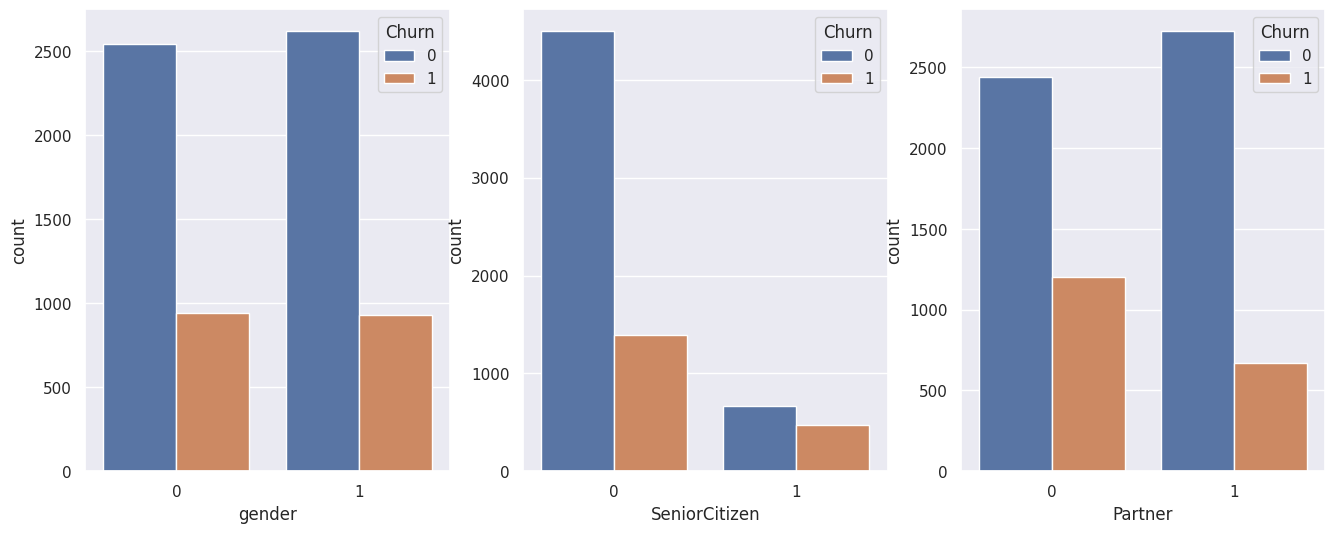

In [ ]:
from matplotlib import pyplot as plt
main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="gender", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="Partner", hue="Churn", ax=subplots[2])

<Axes: xlabel='DeviceProtection', ylabel='count'>

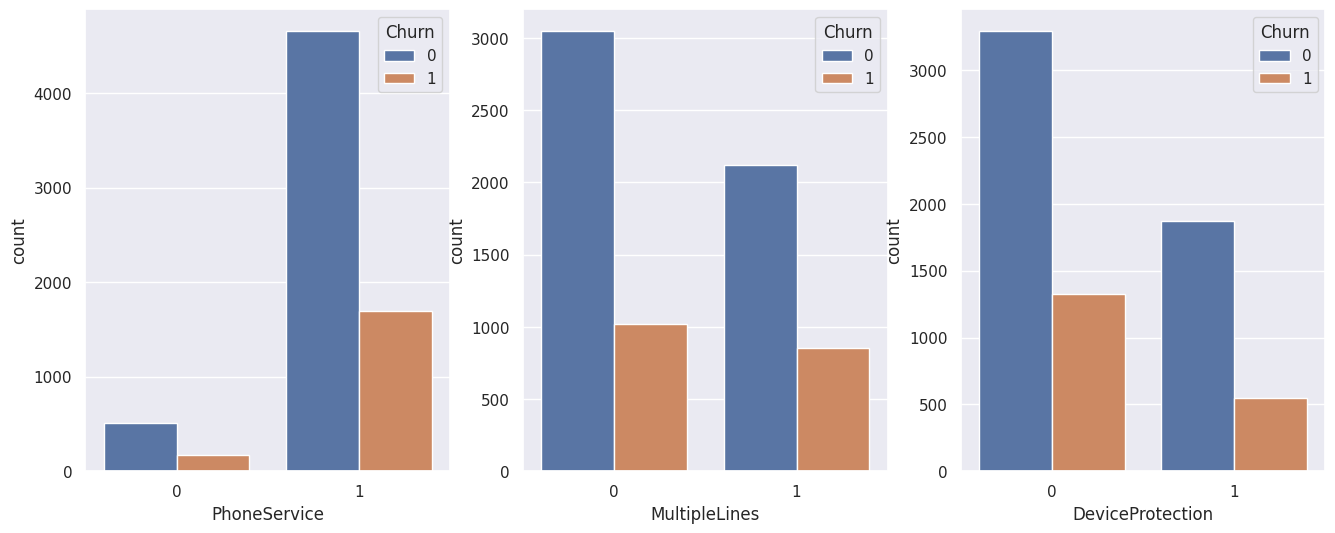

In [ ]:
 main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="PhoneService", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="MultipleLines", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="DeviceProtection", hue="Churn", ax=subplots[2])

# phone service = 0 means what? phone service = 1 means what ? means use data service only majority of the customers here use phone service = 1
# more customer with phone service ,churn more more customer without multiple line, churn more but customer with single line
# also catching up device protection = 0 ,
# means no insurance plan, customer without device protection plan churn more

<Axes: xlabel='TechSupport', ylabel='count'>

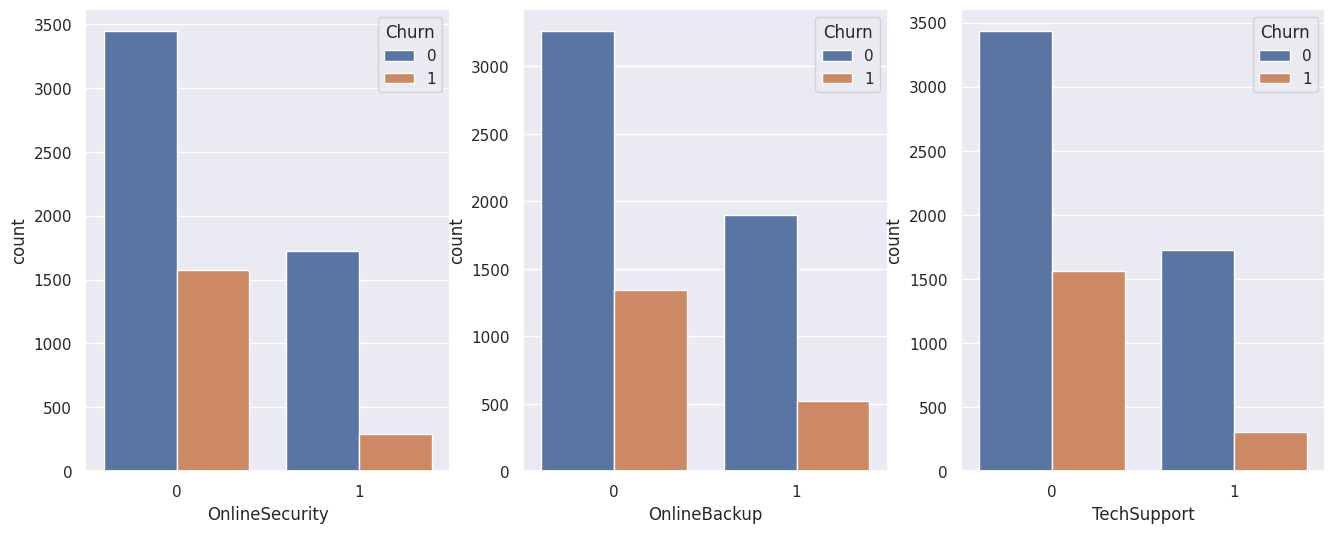

In [ ]:
 main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="OnlineSecurity", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="OnlineBackup", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="TechSupport", hue="Churn", ax=subplots[2])

# customer with on line security, on line backup and tech support plan churn less, why ?

<Axes: xlabel='PaperlessBilling', ylabel='count'>

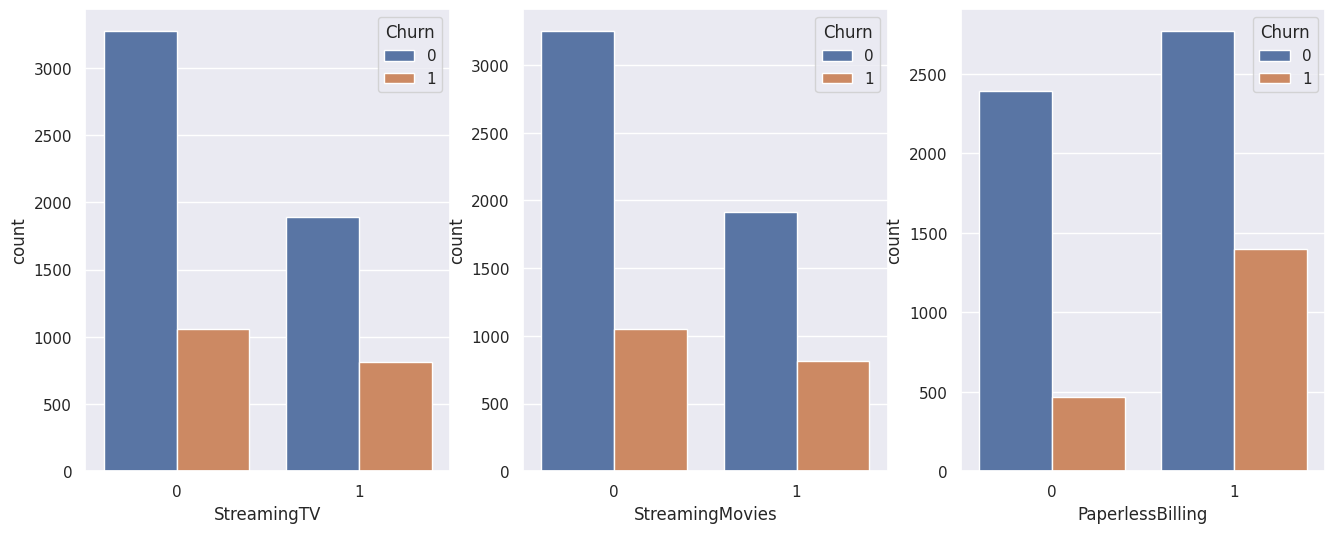

In [ ]:
 main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.countplot(data=df, x="StreamingTV", hue="Churn", ax=subplots[0])
sns.countplot(data=df, x="StreamingMovies", hue="Churn", ax=subplots[1])
sns.countplot(data=df, x="PaperlessBilling", hue="Churn", ax=subplots[2])

<Axes: xlabel='Churn', ylabel='TotalCharges'>

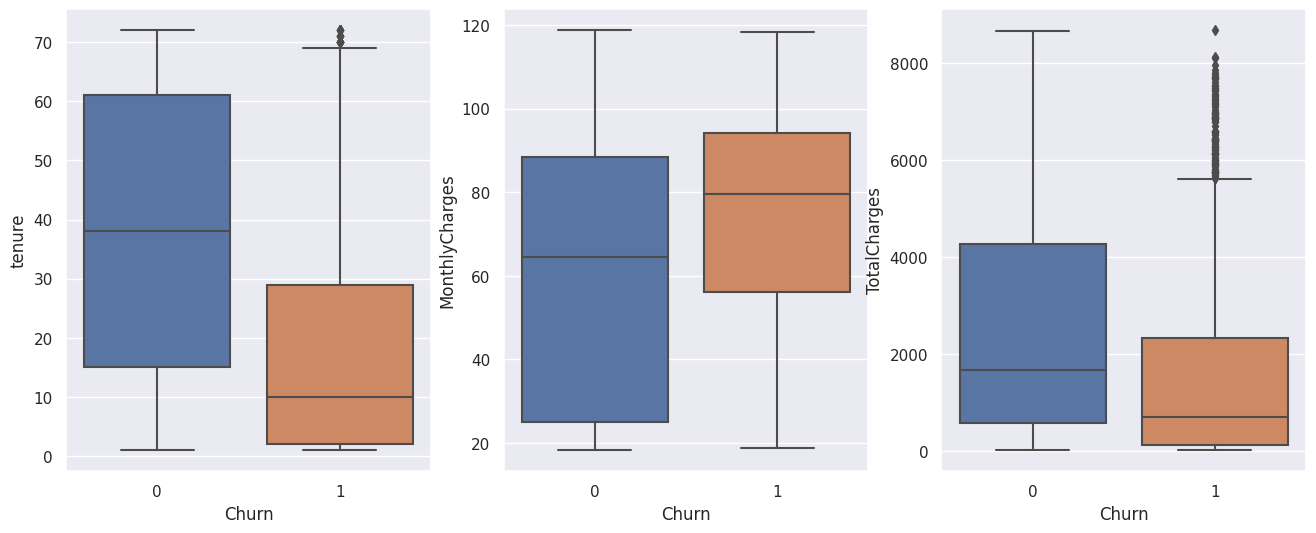

In [ ]:
 main, subplots = plt.subplots(1, 3, figsize=(16,6))
sns.boxplot(data=df, y="tenure", x="Churn", ax=subplots[0])
sns.boxplot(data=df, y="MonthlyCharges", x="Churn", ax=subplots[1])
sns.boxplot(data=df, y="TotalCharges", x="Churn", ax=subplots[2])

# for tenure and total charges we notices some outliers here we used a box plot to check
# for outliers value, please investigate why?
# outliers in statistics means smtg unusual here
# example of outliers, someone age is =235, impossible

In [ ]:
columns = ['SeniorCitizen', 'Partner', 'PhoneService', 'DeviceProtection', 'OnlineSecurity',
                    'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges']

train_data = df[columns] # what are the factors that affect the churn decisions
train_labels = df['Churn'] # what you want the machines to predict, which column

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.3, random_state =1)

we are trying to predict whether the customer will churn or not based on the attribute value in the column, are you senior citizen do you have a partner do you have phone service do you subscribe for device protection plan etc.. we set a label column here churn, our target variable, what we want to predict here we will used decision tree machine learning model to do the prediction this model is a supervised learning techniques, need a label or target variable to be defined first

we are preparing the training data for the machine to learn first

we will split our dataset that consist of 7032 records into 2 groups 70% will be used as a training set for the machine to learn and study the patterns 30% will be used as a test set for the machine to apply what they have learn and do the prediction X axis = column y axis = churn if we know X value then we can predict Y value

In [ ]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(train_data, train_labels)

# create a decision tree model with 6 levels of depth
# send the training data to decision tree model for learning

y_pred = model.predict(X_test)
# we start the run the prediction on the test set based
# on what the machine learn form the training set data

In [ ]:
from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.795260663507109


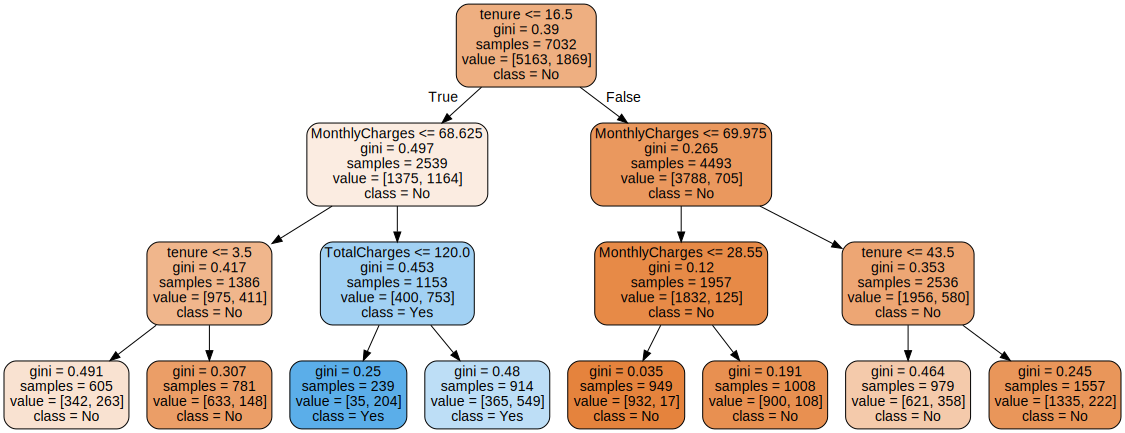

In [ ]:
import graphviz
columns = list(train_data.columns)

dot_data = tree.export_graphviz(model, out_file=None,
                                                     feature_names=columns, class_names=['No', 'Yes'],
                                                     filled = True, rounded = True )
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.linear_model import LogisticRegression

# send the training data into logistic regression model
# for learning purposes, computers learn from the historical data
logmodel = LogisticRegression()
logmodel.fit(train_data, train_labels)

LogisticRegression()

In [ ]:
# apply logistic regression model on the testinf data to do the prediction
# why choose logistic regression n not linear regression model
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
print ("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# we evaluate the accuracy of the prediction, the machine will
# compared with the predicted vs actual value for churn

Accuracy: 0.795260663507109


In [ ]:
# we can measure the accuracy of the prediction

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1555
           1       0.67      0.43      0.53       555

    accuracy                           0.80      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110



In [ ]:
df.nunique

<bound method DataFrame.nunique of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  ...  \
0                0          